In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import os

# feature engineering

In [2]:
def read_file(path):
    file = open(path)
    val_list = file.readlines()
    lists =[]
    for string in val_list:
       string = string.split()
       lists.append(string)
    data=pd.DataFrame(lists)
    data.columns = ['Date','Value']
    return data

In [3]:
file_1 = './nikkei_daily.txt'  # The relative path of the file

In [4]:
df1=read_file(file_1)
df1=df1.drop(labels=[0,7084],axis=0)
df1=df1.reset_index(drop=True) 
df1["Date"] = pd.to_datetime(df1["Date"])

In [5]:
g = pd.DataFrame(columns=['g'], dtype=int)
df1 = pd.concat([df1, g], axis=1)

In [6]:
for i in range(1,df1.shape[0]):
  if df1.iloc[i].Value>=df1.iloc[i-1].Value:
    df1.loc[i,'g']=1
  else:
    df1.loc[i,'g']=-1

In [7]:
df1=df1[df1.Date <= "2007-12-31"]
df1=df1[df1.Date >= "2005-01-03"]
df1=df1.reset_index(drop=True)
df1

,Date,Value,g
0,2005-01-04,11517.75,1.0
1,2005-01-05,11437.52,-1.0
2,2005-01-06,11492.26,1.0
3,2005-01-07,11433.24,-1.0
4,2005-01-11,11539.99,1.0
...,...,...,...
733,2007-12-21,15257,1.0
734,2007-12-25,15552.59,1.0
735,2007-12-26,15653.54,1.0
736,2007-12-27,15564.69,-1.0


In [8]:
file_2 = './sp_daily.txt'

In [9]:
df2=read_file(file_2)
df2=df2.drop(labels=0,axis=0)
df2=df2.reset_index(drop=True) 
df2["Date"] = pd.to_datetime(df2["Date"])
df2

,Date,Value
0,2001-01-02,-0.028032
1,2001-01-03,0.050099
2,2001-01-04,-0.010552
3,2001-01-05,-0.026242
4,2001-01-08,-0.001918
...,...,...
3264,2013-12-24,0.002916
3265,2013-12-26,0.004745
3266,2013-12-27,-0.000337
3267,2013-12-30,-0.000179


In [10]:
x1 = pd.DataFrame(columns=['x1'], dtype=float)
df1 = pd.concat([df1, x1], axis=1)

In [ ]:
j=0
for i in df1["Date"]:
  df1["x1"][j]=df2[df2.Date==i]["Value"]
  j+=1

In [12]:
df1

,Date,Value,g,x1
0,2005-01-04,11517.75,1.0,-0.011671
1,2005-01-05,11437.52,-1.0,-0.003628
2,2005-01-06,11492.26,1.0,0.003506
3,2005-01-07,11433.24,-1.0,-0.001431
4,2005-01-11,11539.99,1.0,-0.006100
...,...,...,...,...
733,2007-12-21,15257,1.0,0.016670
734,2007-12-25,15552.59,1.0,NaN
735,2007-12-26,15653.54,1.0,0.000809
736,2007-12-27,15564.69,-1.0,-0.014216


In [13]:
file_3 = './ex_daily.txt'

In [14]:
df3=read_file(file_3)
df3=df3.drop(labels=0,axis=0)
df3=df3.reset_index(drop=True) 
df3["Date"] = pd.to_datetime(df3["Date"])

In [15]:
df3['Value']=df3['Value'].astype('float')
df3['Value']=np.log1p(df3['Value'])
dif = pd.DataFrame(columns=['dif'],dtype=float)
df3 = pd.concat([df3, dif], axis=1)

In [16]:
for i in range(2,df3.shape[0]):
  df3.loc[i,'dif']=df3.iloc[i-1]['Value'] - df3.iloc[i-2]['Value']

In [17]:
x2 = pd.DataFrame(columns=['x2'],dtype=float)
df1 = pd.concat([df1, x2], axis=1)

In [ ]:
j=0
for i in df1["Date"]:
  df1["x2"][j]=df3[df3.Date==i]["dif"]
  j+=1

In [19]:
df1.isna().sum()

Date      0
Value     0
g         0
x1       23
x2       20
dtype: int64

In [20]:
data = df1.dropna()
data=data.reset_index(drop=True)
data=data.drop(['Date', 'Value'], axis=1)
data

,g,x1,x2
0,1.0,-0.011671,0.001446
1,-1.0,-0.003628,0.013774
2,1.0,0.003506,-0.003044
3,-1.0,-0.001431,0.008728
4,1.0,-0.006100,-0.005775
...,...,...,...
708,1.0,0.004900,0.002362
709,1.0,0.016670,-0.004115
710,1.0,0.000809,0.004340
711,-1.0,-0.014216,-0.003210


In [21]:
D_train, D_test = np.split(data,[data.shape[0]-60])

# Logistic regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
predictors=['x1','x2']
lg = LogisticRegression()  
lg.fit(D_train[predictors], D_train['g'])  
Y_pre_lg_train = lg.predict(D_train[predictors])
Y_pre_lg_test = lg.predict(D_test[predictors])
print('Accuracy, Training Set: ', round(np.mean(Y_pre_lg_train == D_train['g'])*100,5), '%')
print('Accuracy, Test Set: ', round(np.mean(Y_pre_lg_test == D_test['g'])*100,5), '%')

Accuracy, Training Set:  53.13936 %
Accuracy, Test Set:  43.33333 %


# LDA

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X_train = D_train[predictors].values   # covert a dataframe to numpy.array
X_test = D_test[predictors].values

Y_train = D_train['g'].values
Y_test = D_test['g'].values

lda_clf = LDA()
results = lda_clf.fit(X_train, Y_train)

train_pred = results.predict(X_train)
print("Prediction accuracy of train set is:", sum(train_pred == Y_train)/len(Y_train))

# Prediction on the testing dataset
testing_pred = results.predict(X_test)
print("Prediction accuracy of test set is:", sum(testing_pred == Y_test)/len(Y_test))

Prediction accuracy of train set is: 0.5497702909647779
Prediction accuracy of test set is: 0.5333333333333333


# Classification tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [56]:
N_size = np.shape(D_train)[0]
depthList=[1,2,3,4,5,6,7]
xvalMSE=[]
k=10
for iDepth in depthList:
  Dot = np.linspace(0, N_size, k + 1)  # split points
  Bound = [int(i) for i in Dot]  # the boundary index
  Data_Temp = D_train.copy()  

  tree_model = DecisionTreeClassifier(max_depth=iDepth)
  Va_error = []
  for j in range(k):
    Va_df = Data_Temp.iloc[Bound[j]:Bound[j + 1], :]
    Index_tr = np.arange(0, Bound[j]).tolist() + np.arange(Bound[j + 1], N_size).tolist()
    Tr_df = Data_Temp.iloc[Index_tr, :]
    X_train_c = Tr_df[predictors].values
    Y_train_c = Tr_df['g'].values
    X_test_c = Va_df[predictors].values
    Y_test_c = Va_df['g'].values
    tree_model.fit(X_train_c, Y_train_c)
    # Y_pre_tr = lm.predict(Tr_df.loc[:, ['horsepower']])
    Y_pre_va = tree_model.predict(X_test_c)
    # mse_tr = np.mean((Y_pre_tr - Tr_df['mpg']) ** 2)
    mse_va = np.mean((Y_pre_va - Y_test_c) ** 2)
    Va_error.append(mse_va)
  xvalMSE.append(np.mean(Va_error))

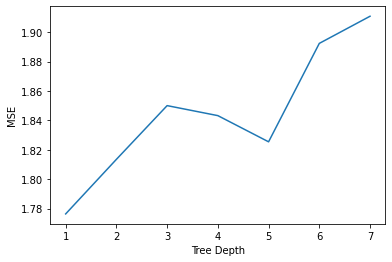

In [57]:
plt.plot(depthList,xvalMSE)
plt.axis('tight')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.show()

In [60]:
idx_max = np.argmin(xvalMSE)
sm_best_tree_depth = depthList[idx_max]
min_mse = xvalMSE[idx_max]
print('The depth-{} tree achieves the min MSE {} on training dataset'.format(
      sm_best_tree_depth, round(min_mse,5)))

The depth-1 tree achieves the min MSE 1.77641 on training dataset


In [61]:
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test

In [62]:
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, Y_train,  X_test, Y_test, sm_best_tree_depth)

Single tree depth:  1
Accuracy, Training Set:  56.66156 %
Accuracy, Test Set:  51.66667 %


# SVM with linear kernel 

In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [64]:
# tuning parameter with 10-fold cross-validation.
svc1 = SVC(kernel='linear')
# generate tuning parameters
c_space = np.array([0.001, 0.01, 0.1, 1, 5, 10, 100])
# convert it to dictionary
para_grid = {'C': c_space}
# tuning process
tune = GridSearchCV(svc1, para_grid, cv=10)
tune.fit(X_train, Y_train)
# get the best parameter
print(tune.best_params_)

{'C': 0.001}


In [65]:
svc0 = SVC(kernel='linear', C=0.001)
svc0.fit(X_train, Y_train)
y_pred_t = svc0.predict(X_train)
y_pred = svc0.predict(X_test)
print('best parameter: ', tune.best_params_)
print('Accuracy, Training Set: ', round(np.mean(y_pred_t == Y_train)*100,5), '%')
print('Accuracy, Test Set: ', round(np.mean(y_pred == Y_test)*100,5), '%')

best parameter:  {'C': 0.001}
Accuracy, Training Set:  53.13936 %
Accuracy, Test Set:  43.33333 %


# SVM with Radial kernel

In [68]:
svm1 = SVC(kernel='rbf')
# generate tuning parameters
c_space = np.array([0.1, 1, 10, 100, 1000])
g_space = np.array([0.5, 1, 2, 3, 4])
# convert them to a dictionary
para_grid = {'C': c_space, 'gamma': g_space}
# tuning process
tune2 = GridSearchCV(svm1, para_grid, cv=10)
tune2.fit(X_train, Y_train)
# get the best parameter
print(tune2.best_params_)

{'C': 0.1, 'gamma': 0.5}


In [70]:
# create a svm classifier with gaussian kernel
svm0 = SVC(kernel='rbf', gamma=0.5, C=0.1)
# fit the model using training data
svm0.fit(X_train, Y_train)

y_pred_t2 = svm0.predict(X_train)
y_pred2 = svm0.predict(X_test)
print('best parameter: ', tune2.best_params_)
print('Accuracy, Training Set: ', round(np.mean(y_pred_t2 == Y_train)*100,5), '%')
print('Accuracy, Test Set: ', round(np.mean(y_pred2 == Y_test)*100,5), '%')

best parameter:  {'C': 0.1, 'gamma': 0.5}
Accuracy, Training Set:  53.13936 %
Accuracy, Test Set:  43.33333 %
